# Use CDF to Calculate Probabilities (Practice)
- Alexis Deviney
- 5/2/22

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than than the mean (hint: do you know this answer intuitively?)


In [5]:
def calculate_prob_cdf(data, low_end = None, high_end = None):
    mean = np.mean(data)
    std = np.std(data)
    min = np.min(data)
    max = np.max(data)
    if low_end is None:
        low_end = min
    if high_end is None:
        high_end = max
    x_range = np.linspace(min, max,1000)
    cdf = stats.norm.cdf(x_range, loc=mean, scale=std)
    fig, ax = plt.subplots(figsize=(12,6))
    sns.histplot(x=data, stat='density', cumulative = True)
    ax.axvline(low_end, color= 'black')
    ax.axvline(high_end, color ='black')
    ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
    return stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

In [6]:
females = df.loc[df['Gender'] == 'Female']
data = females['Height']

## Probability of height between 55.0 and 56.0 inches

0.6833905516766098

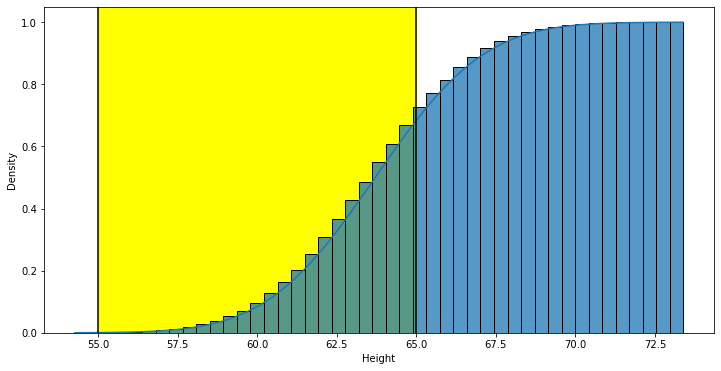

In [7]:
calculate_prob_cdf(data, 55, 65)

## Probability of height less than 5 ft

0.0842353831336436

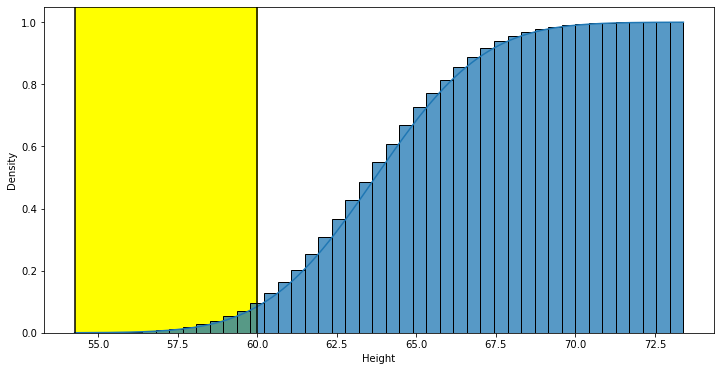

In [8]:
calculate_prob_cdf(data, None, 60)

## Probability of Height Greater than the Mean

Intuitively, the answer to this is 50%. This is confirmed mathematically:

0.49983515925093835

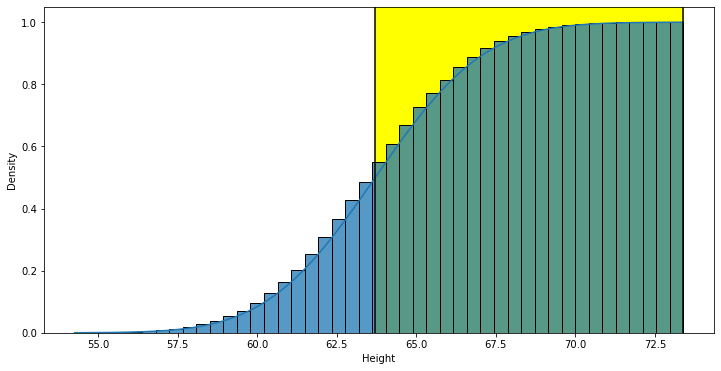

In [10]:
calculate_prob_cdf(data, np.mean(data), None)